In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import sklearn
plt.rcParams['figure.figsize'] = (12.0, 9.0)

we will work on boston dataset, which is readily available in sklearn datasets.

In [2]:
from sklearn.datasets import load_boston
boston_dataset=load_boston()

In [3]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
boston_dataset['data'].shape

(506, 13)

In [6]:
print(boston_dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
df=pd.DataFrame(boston_dataset.data)
df.columns=boston_dataset.feature_names

Here price is our output.

In [8]:
df['Price']=boston_dataset.target

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
df.shape

(506, 14)

Here below we will find which feture is high positive or high negative correlated with the target(i.e,price)

In [11]:
corr=df.corr()

In [12]:
corr['Price'].sort_values(ascending=False)

Price      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: Price, dtype: float64

This below matrix is correlation matrix of all the features(ex. price with all faetures including price.)
and the diagonal is filled with one because feature correlated with it self is 1.

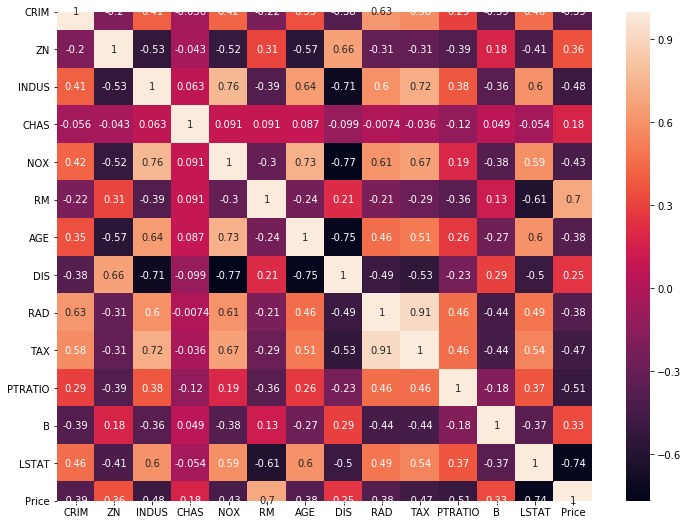

In [13]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)
sns.heatmap(corr,annot=True)

This below matrix is scatter plot matrix of all the features(ex. price with all features including price.)

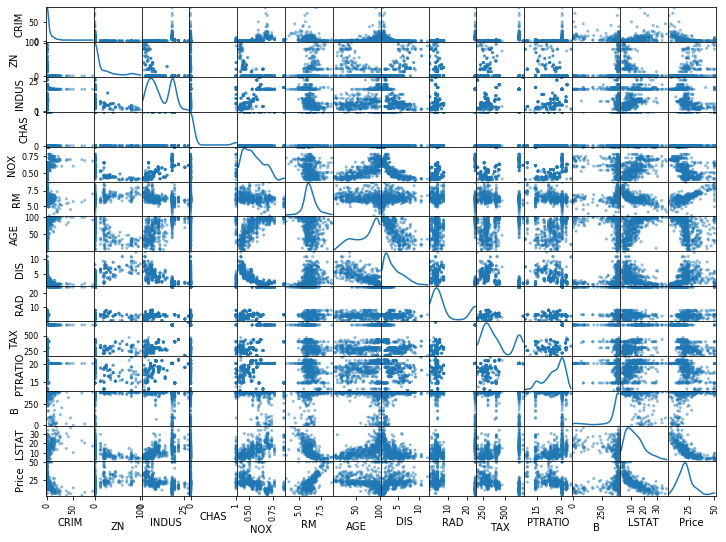

In [14]:
from pandas.plotting import scatter_matrix
axes = scatter_matrix(df, alpha=0.5, diagonal='kde')

Now after looking at correlation matrix and scatter plots, we can come to a conclusion that feature RM is positively correlated to Price of 0.695360.
so we consider RM as single feature
and price as target

In [15]:
x = df['RM']
y = df['Price']

Scatter plot of Price vs RM

Text(0, 0.5, 'House Price')

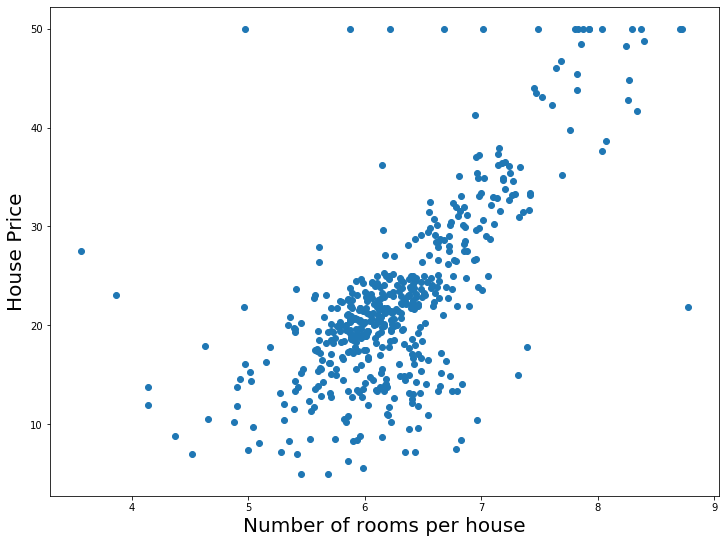

In [16]:
plt.scatter(x,y)
plt.xlabel('Number of rooms per house', size = 20)
plt.ylabel('House Price', size = 20)

Now we will normalize of features

In [17]:
x = (x - x.mean())/x.std()
y = (y - y.mean())/y.std()

Scatter plot after Normalizing features

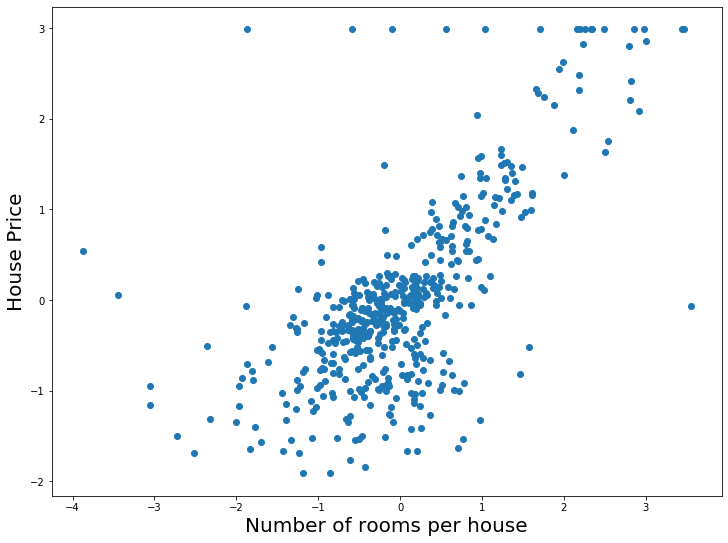

In [18]:
plt.scatter(x,y)
plt.xlabel('Number of rooms per house', size = 20)
plt.ylabel('House Price', size = 20)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.2,random_state=10)

In [20]:
Xtrain = np.c_[np.ones(Xtrain.shape[0]),Xtrain]

In [21]:
Xtrain.shape

(404, 2)

We will set alpha, m. 
consider theta as random values initially.

In [22]:
alpha = 0.0001
m = Ytrain.size
theta = np.random.rand(2)

In [23]:
def gradient_descent(x, y, m, theta,  alpha):
    cost_list = []
    theta_list = []  
    prediction_list = []
    run = True
    cost_list.append(1e10)    
    i=0
    while run:
        prediction = np.dot(x, theta) 
        prediction_list.append(prediction)
        error = prediction - y          
        cost = 1/(2*m) * np.dot(error.T, error)  
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))   
        theta_list.append(theta)
        if cost_list[i]-cost_list[i+1] < 1e-9:  
            run = False
        i+=1
    cost_list.pop(0)  
    return prediction_list, cost_list, theta_list

In [24]:
prediction_list, cost_list, theta_list = gradient_descent(Xtrain, Ytrain, m, theta, alpha)
theta = theta_list[-1]

Final best fit values of theta

In [25]:
print("Values of theta are {:2f} and {:2f}".format(theta[0], theta[1]))

Values of theta are -0.030261 and 0.657714


In [26]:
prediction_list[-1]

array([-3.31339551e-01, -2.29713097e+00, -2.06839429e-01, -7.95310322e-02,
       -6.97351191e-01, -3.12617728e-01,  2.97713701e-01, -6.12166896e-01,
        5.90104580e-02,  1.12367654e-01,  3.72600993e-01,  2.93969337e-01,
       -3.59422286e-01,  2.13465498e-01, -8.54614504e-01, -6.76757186e-01,
       -6.44930087e-01, -3.85632838e-01,  6.54364429e-01,  8.64984938e-01,
       -5.70978886e-01, -8.55550595e-01, -4.71753224e-01,  9.27097394e-02,
       -1.16038587e-01, -4.11843390e-01,  6.08826403e-02,  1.02880089e+00,
        4.98037207e-01, -7.35730928e-01,  4.12852913e-01,  5.99135051e-01,
        8.33488279e-02,  9.36458305e-02,  1.66660940e-01,  8.89323308e-01,
       -1.55855505e+00, -3.36956098e-01,  3.83834087e-01, -4.67072768e-01,
        1.57300029e-01, -1.22156223e+00, -9.48223619e-01, -6.58971454e-01,
        1.12615437e+00,  6.18187314e-02, -4.37117851e-01, -4.96091594e-01,
       -1.07613767e-01, -4.00610297e-01,  1.64006841e+00,  1.32025568e-01,
       -9.48223619e-01, -

In [27]:
len(prediction_list[-1])

404

In [28]:
len(Xtest)

102

In [29]:
cost_list[-1]

0.2561831205522723

In [30]:
theta_list[-1]

array([-0.03026067,  0.65771391])

Final plot of cost function vs iterations

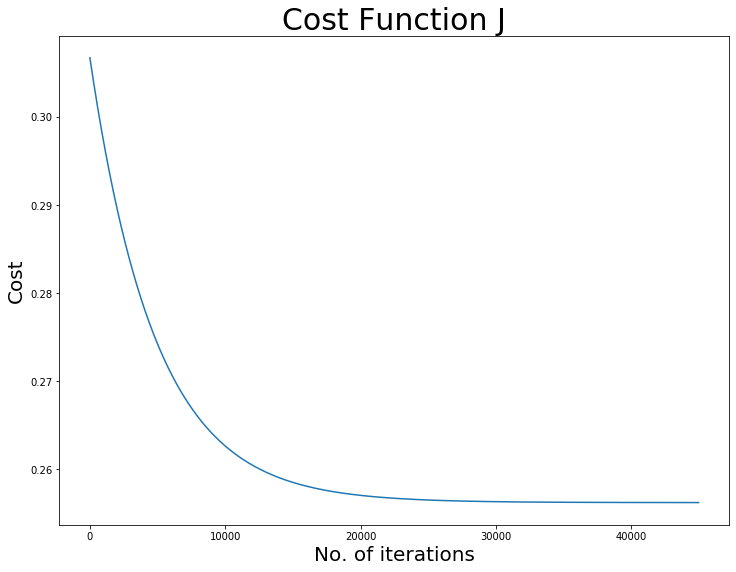

In [31]:
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list)
plt.show()

In [32]:
Xtest = np.c_[np.ones(Xtest.shape[0]),Xtest]

Testing

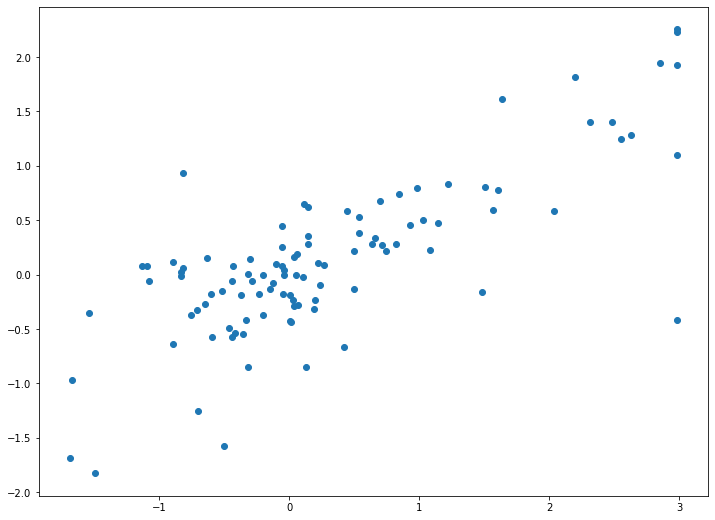

In [33]:
predict=np.dot(Xtest,theta)
plt.scatter(Ytest,predict)

In [34]:
from sklearn import metrics
from sklearn.metrics import r2_score
print({'MAE':metrics.mean_absolute_error(Ytest,predict)})
print({'MSE':metrics.mean_squared_error(Ytest,predict)})
print({'RMSE':np.sqrt(metrics.mean_absolute_error(Ytest,predict))})
print({'R Squared Error':r2_score(Ytest,predict)})

{'MAE': 0.5305171487045283}
{'MSE': 0.5392424575459566}
{'RMSE': 0.728366081517068}
{'R Squared Error': 0.5638513228591928}


In [35]:
error=pd.DataFrame({'Actual':Ytest,'prediction':predict})
error_10=error.head(10)
error_10

,Actual,prediction
305,0.637939,0.279928
193,0.931510,0.452169
65,0.105163,-0.025238
349,0.442225,0.582285
151,-0.318884,-0.854615
433,-0.895152,0.111431
161,2.986505,1.097136
129,-0.895152,-0.636506
269,-0.199281,-0.371592
226,1.638254,1.612922


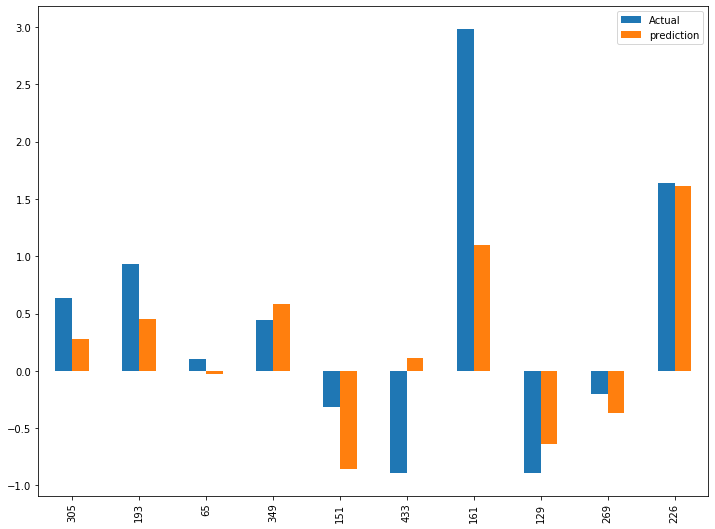

In [36]:
error_10.plot(kind='bar')